In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
# Use data from Lending Club

y2015 = pd.read_csv('LoanStats3d.csv', skipinitialspace=True, header=1)

# Note the warning about dtypes


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
#X = pd.get_dummies(X)

#cross_val_score(rfc, X, Y, cv=5)

In [4]:
#categorical = y2015.select_dtypes(include=['object'])
#for i in categorical:
#    column = categorical[i]
#    print(i)
#    print(column.nunique())

In [5]:
# Convert ID and Interest Rate to numeric
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove the two summary rows at the end that don't contain data

y2015 = y2015[:-2]

In [8]:
pd.get_dummies(y2015).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0


## Start of model

In [9]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

array([0.97962528, 0.9805514 , 0.98135879, 0.98157251, 0.97076704,
       0.97573023, 0.96366572, 0.98040799, 0.97914836, 0.98009785])

In [10]:
corr = y2015.corr()

In [11]:
print(corr)

                                      id  member_id  loan_amnt  funded_amnt  \
id                              1.000000   0.997540  -0.008288    -0.008288   
member_id                       0.997540   1.000000  -0.008620    -0.008620   
loan_amnt                      -0.008288  -0.008620   1.000000     1.000000   
funded_amnt                    -0.008288  -0.008620   1.000000     1.000000   
funded_amnt_inv                -0.008554  -0.008885   0.999994     0.999994   
int_rate                       -0.053402  -0.053447   0.140572     0.140572   
installment                    -0.012919  -0.013274   0.941205     0.941205   
annual_inc                      0.015055   0.014958   0.305734     0.305734   
dti                             0.005692   0.005806   0.006103     0.006103   
delinq_2yrs                     0.002300   0.002261  -0.010424    -0.010424   
inq_last_6mths                  0.000660   0.000715  -0.039040    -0.039040   
mths_since_last_delinq          0.006322   0.006186 

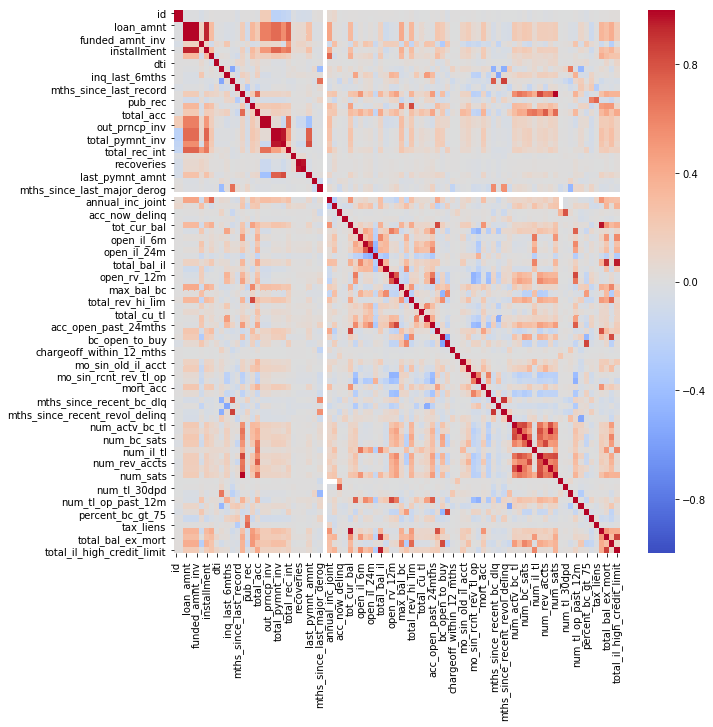

In [12]:
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')

In [13]:
select_best = SelectKBest(f_classif, k=10)

In [14]:
X_new = select_best.fit_transform(X, Y)

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [26 97] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [15]:
columns = X.columns.values
print(columns[26])
print(columns[97])

X.drop(columns=['policy_code', 'pymnt_plan_n'], inplace=True);


policy_code
pymnt_plan_n


In [16]:
X_new = select_best.fit_transform(X, Y)

features = select_best.get_support()
for x in range(len(features)):
    if features[x] == 1:
        print(columns[x])


out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
collection_recovery_fee
last_pymnt_amnt
last_pymnt_d_Jan-2015
last_pymnt_d_Sep-2015
last_credit_pull_d_Jan-2015


In [17]:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Columns: 103 entries, id to total_il_high_credit_limit
dtypes: float64(87), object(16)
memory usage: 330.9+ MB


In [18]:
y2015.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.210950e+05,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,...,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,5.393097e+07,5.759576e+07,15240.285862,15240.285862,15234.156412,12.600388,441.860087,7.696561e+04,19.195989,0.347397,...,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,9.475423e+06,1.013358e+07,8571.325901,8571.325901,8567.935752,4.318453,244.851179,7.394996e+04,23.504038,0.927695,...,0.522758,1.853858,8.875399,36.054458,0.385975,0.444231,1.756722e+05,4.907494e+04,21840.371112,4.394271e+04
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,900.000000,5.320000,23.400000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,4.612481e+07,4.922617e+07,8500.000000,8500.000000,8500.000000,9.170000,263.930000,4.600000e+04,12.590000,0.000000,...,0.000000,1.000000,90.900000,15.400000,0.000000,0.000000,5.090900e+04,2.259850e+04,7800.000000,1.548150e+04
50%,5.536031e+07,5.895358e+07,14000.000000,14000.000000,14000.000000,12.290000,385.410000,6.500000e+04,18.600000,0.000000,...,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,1.114050e+05,3.959600e+04,15200.000000,3.297000e+04
75%,6.186217e+07,6.604584e+07,20000.000000,20000.000000,20000.000000,15.590000,578.790000,9.169050e+04,25.340000,0.000000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.496290e+05,6.565100e+04,28600.000000,5.829900e+04
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,39.000000,30.000000,100.000000,100.000000,11.000000,85.000000,9.999999e+06,2.921551e+06,834300.000000,2.101913e+06


In [19]:
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X_new, Y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

array([0.93424521, 0.92826102, 0.93377027, 0.9438389 , 0.90657801,
       0.93787699, 0.938018  , 0.94673348, 0.92545183, 0.96002945])

In [20]:
s = corr.abs().unstack()
so = s.sort_values(kind="quicksort", ascending=False).drop_duplicates()

In [21]:
print(so[1:20])

out_prncp_inv                   out_prncp                         0.999997
total_pymnt                     total_pymnt_inv                   0.999997
funded_amnt_inv                 loan_amnt                         0.999994
open_acc                        num_sats                          0.998602
id                              member_id                         0.997540
num_actv_rev_tl                 num_rev_tl_bal_gt_0               0.980849
tot_cur_bal                     tot_hi_cred_lim                   0.974943
recoveries                      collection_recovery_fee           0.973343
total_pymnt_inv                 total_rec_prncp                   0.964892
total_pymnt                     total_rec_prncp                   0.964876
total_il_high_credit_limit      total_bal_il                      0.958632
installment                     loan_amnt                         0.941205
                                funded_amnt_inv                   0.941187
total_bal_ex_mort        

In [ ]:
print(so[('loan_status')])